# Loan Application Status Prediction

## Problem Statement:

This dataset includes details of applicants who have applied for loan. 
The dataset includes details like credit history, loan amount, their income, dependents etc. 

## Prediction

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#import all libaries
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
url="https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv"


In [2]:
#stroing into csv file
df = pd.read_csv(url)
df.to_csv("Loan_Application_Status_Prediction.csv",sep='\t')

In [3]:
#create dataframe
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Here Gender, Married,Education,Self_Employed,Property_Area are the columns which has string data type and they are categorical(Nominal)data type.
And Dependents,ApplicantIncome are the columns which has integer data type.
And CoapplicantIncome,LoanAmount,Loan_Amount_Term, Credit_History are the columns which has continous(float) data type.
And the Target column which we are going to predict is Loan_Status which has categorical(Nominal) and it is a string data type.
Since We are predicting categorical data.Hence it is a Classification Problem

In [4]:
df.columns #checking column names

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Exploratory Data Analysis(EDA):

In [6]:
df.isnull().sum() #checking null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

the approval status "yes" is higher in number than the "No" approval status

Y    422
N    192
Name: Loan_Status, dtype: int64

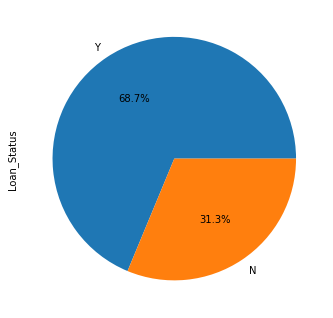

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
df['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
df['Loan_Status'].value_counts()

the loan aprroval status is higher than the non approval status

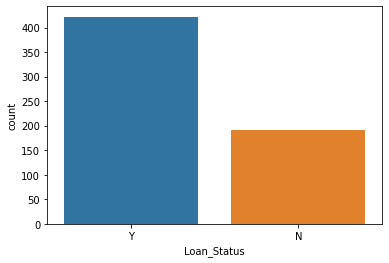

In [9]:
ax = sns.countplot(x="Loan_Status", data=df)

Approval is higher than non approval

In [10]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [11]:
df['Dependents'].replace('3+', 3, inplace=True) # replace 3+ with 3
df['Dependents'].unique()

array(['0', '1', '2', 3, nan], dtype=object)

shows dependents of the loan applicant.

In [12]:
#replace yes approval as '1' and no approval as '0'
df['Loan_Status'].replace('N', 0, inplace=True)
df['Loan_Status'].replace('Y', 1, inplace=True)

In [13]:
# replace empty values of the columns by mean,most frequent values
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy="mean")
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))



In [14]:
for col in [ 'Dependents', 'Gender','Married','Self_Employed','Loan_Amount_Term','Credit_History']:
    imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")
    df[col]=imp.fit_transform(df[col].values.reshape(-1,1))

In [15]:
df.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

shows unique values of the columns

In [16]:
df.nunique().to_frame("# of unique values")

,# of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,10


In [17]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [18]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [19]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [20]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


combine the column since it refers to same information

In [21]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [22]:
#drop unwanted columns
df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

In [23]:
cross = pd.crosstab(index = df['Education'],columns = df['Loan_Status'])
round((cross.T/cross.sum(axis=1)).T,2)

Loan_Status,0,1
Education,,
Graduate,0.29,0.71
Not Graduate,0.39,0.61


graduate getting higher loan approval than non garduate

In [24]:
cross = pd.crosstab(index = df['Self_Employed'],columns = df['Loan_Status'])
round((cross.T/cross.sum(axis=1)).T,2)

Loan_Status,0,1
Self_Employed,,
No,0.31,0.69
Yes,0.32,0.68


self employed doesnt show much impact on the approval status.it means giving loan is not much based on this

In [25]:
cross = pd.crosstab(index= df['Property_Area'],columns = df['Loan_Status'])
round(((cross.T)/cross.sum(axis =1)).T,2)

Loan_Status,0,1
Property_Area,,
Rural,0.39,0.61
Semiurban,0.23,0.77
Urban,0.34,0.66


the loan approval for the semiurban is higher than the others

In [26]:
cross = pd.crosstab(index = df['Dependents'],columns = df['Loan_Status'])
round(((cross.T)/cross.sum(axis=1)).T,2)

Loan_Status,0,1
Dependents,,
3,0.35,0.65
0,0.31,0.69
1,0.35,0.65
2,0.25,0.75


Loan approval status  for 2 dependants is higher than the others

In [27]:
cross = pd.crosstab(index= df['Loan_Status'],columns = df['TotalIncome'])
round(((cross.T)/cross.sum(axis =1)).T,2)

TotalIncome,1442.0,1830.0,1880.0,1950.0,1963.0,2000.0,2138.0,2165.0,2178.0,2213.0,...,27500.0,33846.0,35673.0,37719.0,39999.0,42083.0,43897.0,51763.0,63337.0,81000.0
Loan_Status,,,,,,,,,,,,,,,,,,,,,
0,0.01,0.01,0.01,0.01,0.0,0.01,0.01,0.0,0.01,0.0,...,0.0,0.01,0.01,0.0,0.0,0.01,0.0,0.0,0.0,0.01
1,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,...,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00


it shows total incomes and its loan approval counts

In [28]:
df.groupby(['Education'])['Loan_Status'].value_counts()


Education     Loan_Status
Graduate      1              340
              0              140
Not Graduate  1               82
              0               52
Name: Loan_Status, dtype: int64

loan approval status for the graduate is higjer than other

In [29]:
df.groupby(['Self_Employed'])['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             1              366
               0              166
Yes            1               56
               0               26
Name: Loan_Status, dtype: int64

salaried employees has higher chance of getting loan than self employeed

In [30]:
# making bins for Income
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
df['Income_bin'] = pd.cut(df['TotalIncome'],bins,labels=group)

created bins to put seggregate the Income for analysis purpose

In [31]:
df.groupby(['Income_bin'])['Loan_Status'].value_counts()

Income_bin  Loan_Status
Low         0               14
            1               10
Average     1               87
            0               32
High        1              159
            0               65
Very high   1              166
            0               81
Name: Loan_Status, dtype: int64

the bins are created with low,avearge,high,very high salaries and the loan approval status is high for "very high "income group than others

In [32]:
# making bins for LoanAmount variable
bins = [0,100,200,700]
group = ['Low','Average','High']
df['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

the bins are created with low,average,high loan amount 

In [33]:
df.groupby(['LoanAmount_bin'])['Loan_Status'].value_counts()

LoanAmount_bin  Loan_Status
Low             1              107
                0               47
Average         1              266
                0              114
High            1               49
                0               31
Name: Loan_Status, dtype: int64

loan approval status is good for average loan amount.bank will not offers all time high loan amount

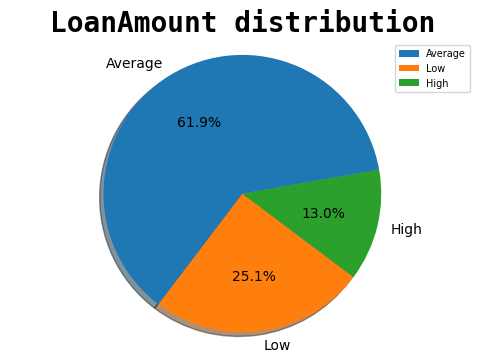

In [34]:
# Creating a pie chart for 'Marital status'
marital = df['LoanAmount_bin'].value_counts()

plt.style.use('default')
plt.figure(figsize=(6, 4))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(None), shadow=True, autopct='%1.1f%%')
plt.title('LoanAmount distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

61.9 percent of the time bank offers only the average loan amount.either high loan amount or low loan amount bank cant offer all the time

In [35]:
df.groupby(['Credit_History'])['Loan_Status'].value_counts()

Credit_History  Loan_Status
0.0             0               82
                1                7
1.0             1              415
                0              110
Name: Loan_Status, dtype: int64

keeping credit history as 1 by paying the loan dues properly at time increases the chance of loan approval more always

In [36]:
#drop unwanted columns created only for analysis purpose 
df.drop(['Income_bin', 'LoanAmount_bin'], axis=1, inplace=True)

In [37]:
#categorical columns
df_cat = df[['Gender', 'Married','Education','Self_Employed','Credit_History','Property_Area','Dependents','Loan_Amount_Term','Credit_History']]

In [38]:
list(enumerate(df_cat))

[(0, 'Gender'),
 (1, 'Married'),
 (2, 'Education'),
 (3, 'Self_Employed'),
 (4, 'Credit_History'),
 (5, 'Property_Area'),
 (6, 'Dependents'),
 (7, 'Loan_Amount_Term'),
 (8, 'Credit_History')]

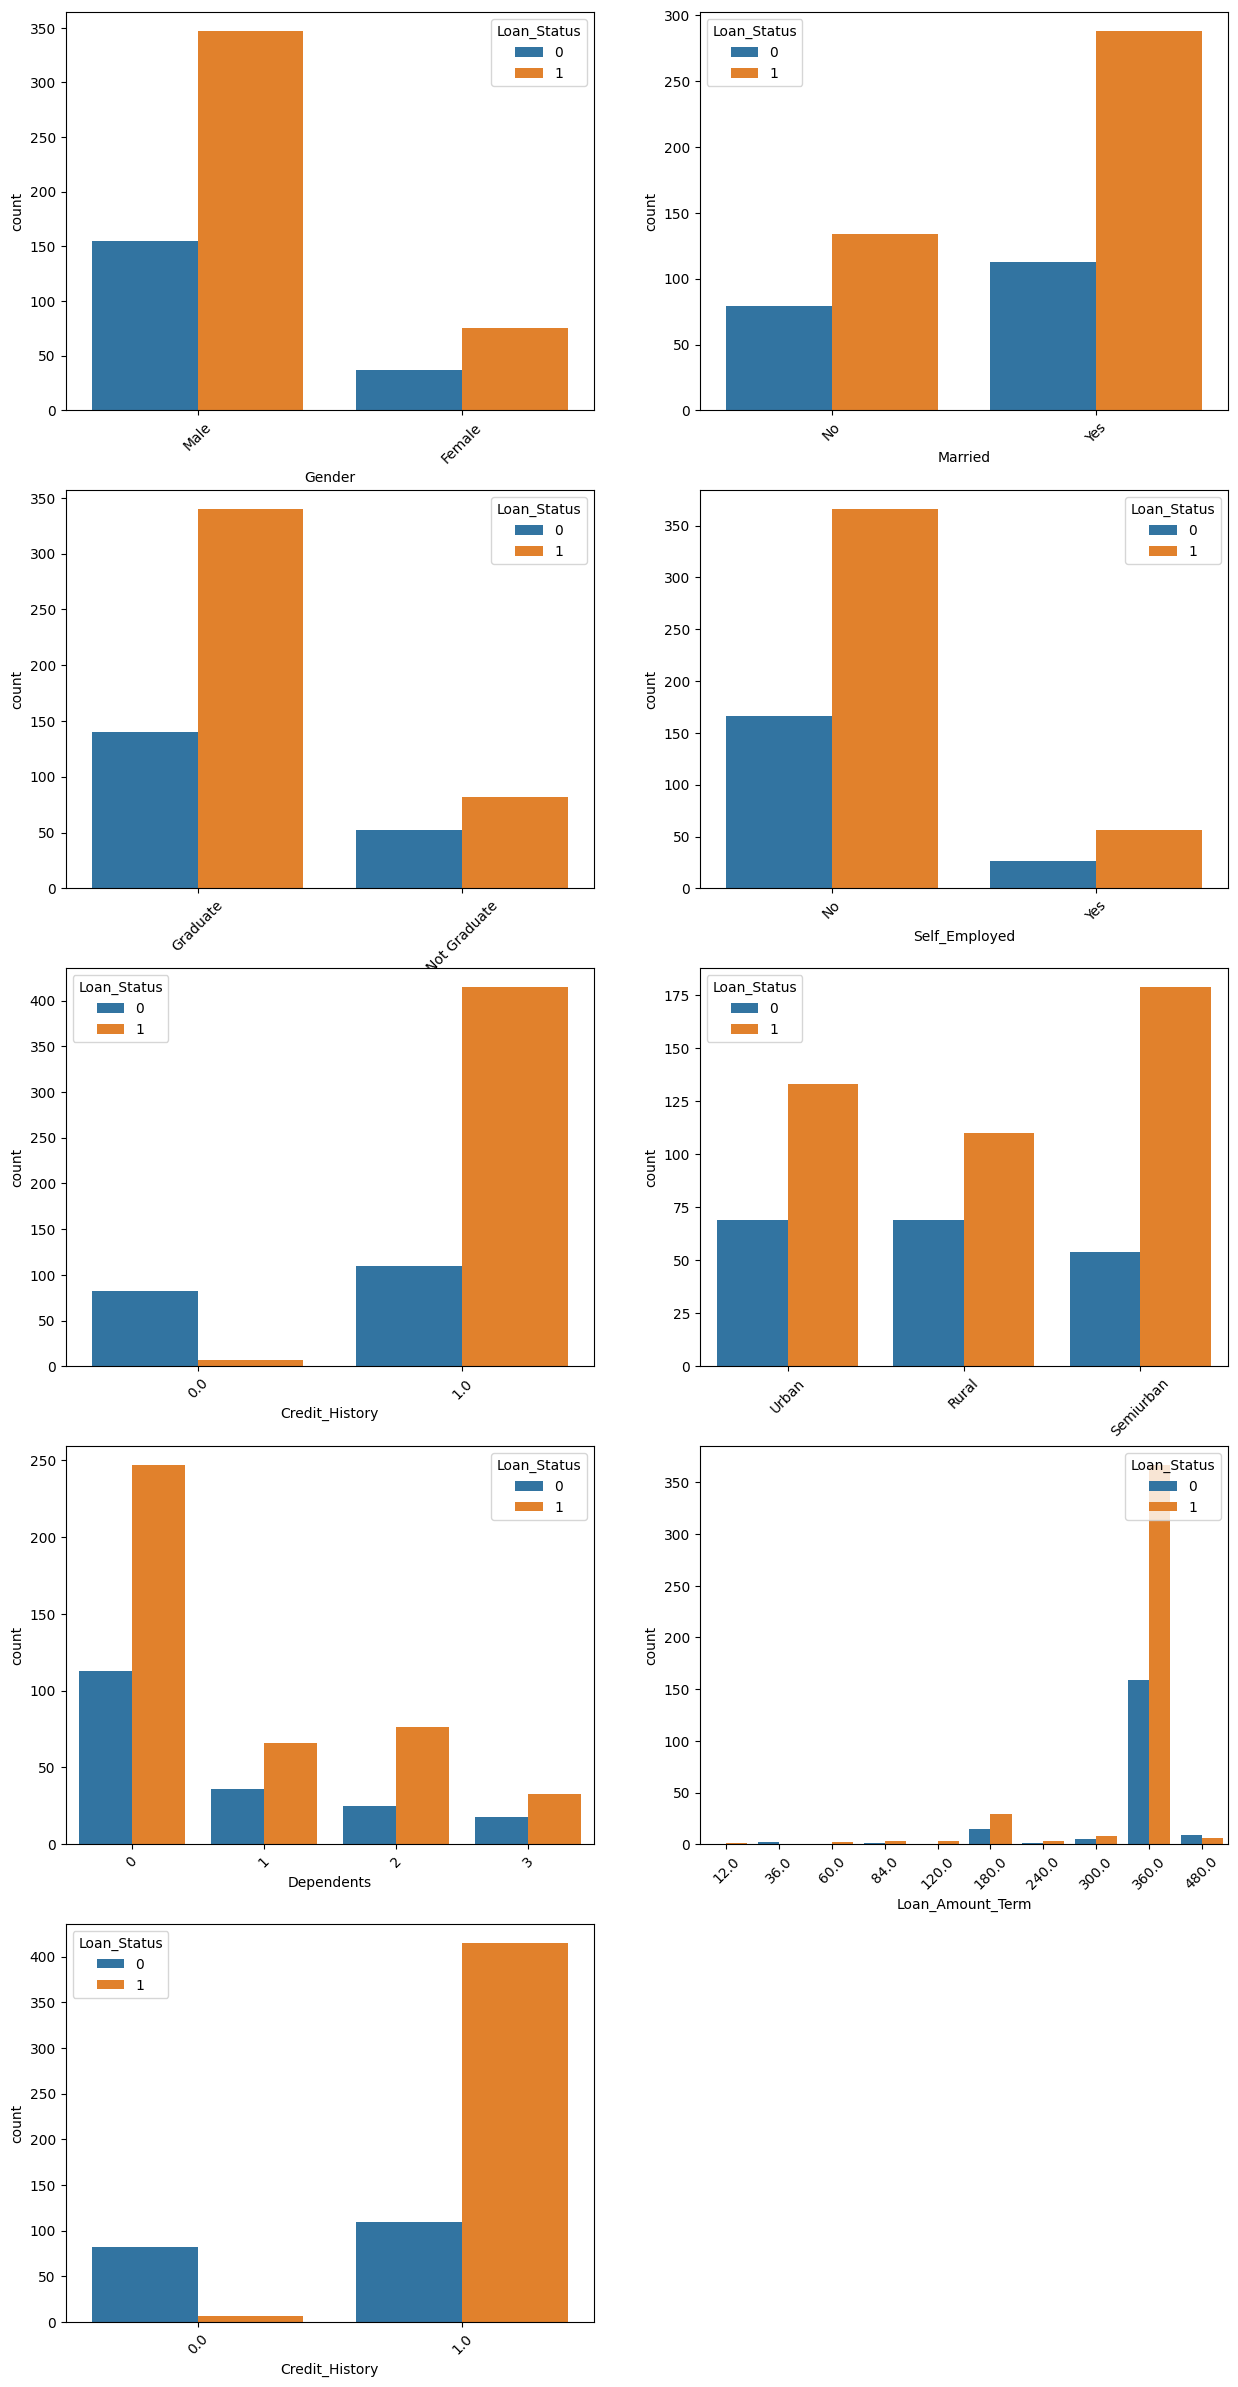

In [39]:
plt.figure(figsize=(15,30))
for i in enumerate(df_cat):
    plt.subplot(5,2,i[0]+1)
    sns.countplot(i[1],hue="Loan_Status",data=df)
    plt.xticks(rotation=45)

1.chances of getting loan to male is higher than female
2.getting loan is easier for married people than unmarried
3.graduates gets loan easily than non graduate
4.Not a self employeedb(salaried people)gets loan easily
5.if credit history is 1 we will get loan easily 
6.semi urban people gets loan easily than others
7.less dependents has higher chance of getting loan easily
8.our fixing tenure 360 yields the loan easily

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

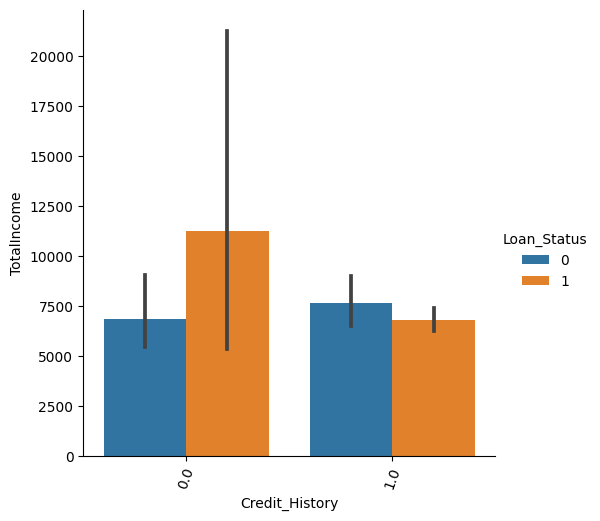

In [40]:
sns.catplot(x="Credit_History",y="TotalIncome",hue="Loan_Status",data=df,kind="bar")
plt.xticks(rotation=70)

even if credit history is 0 and if the income is higher then we can get loan easily

In [41]:
#take numerical column values
df_num=df[['TotalIncome','LoanAmount']]

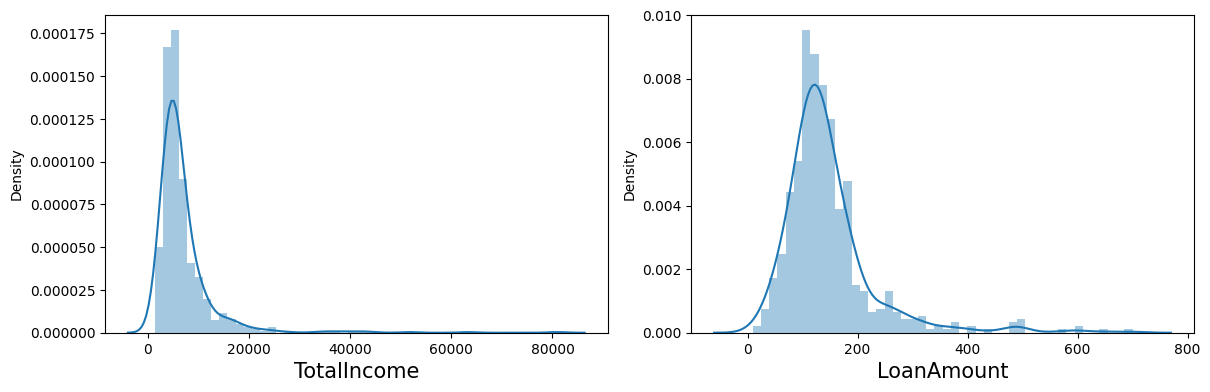

In [42]:
plt.figure(figsize = (18, 15))
plotnumber = 1

for col in df_num:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

distribution is slighlty skewed so might have outliers.it means some of the values are very high and in out of range.and data is slightly normally distributed

the good income but not very high gets the average loan amount easily.not higher loan amount value

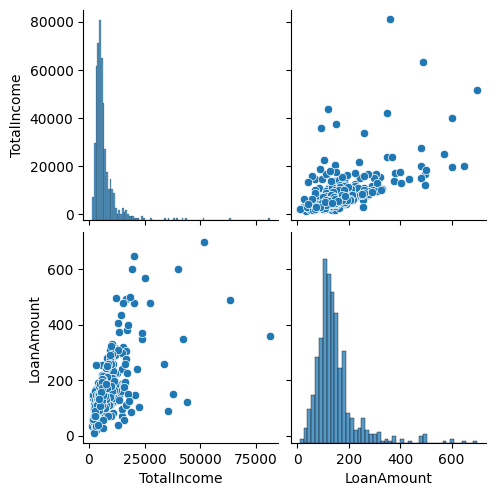

In [43]:
sns.pairplot(df_num)
plt.show()

if totalincome increases the chances of getting loan also good and will increase

<AxesSubplot:title={'center':'Credit History and loan amount'}, xlabel='Credit_History', ylabel='LoanAmount'>

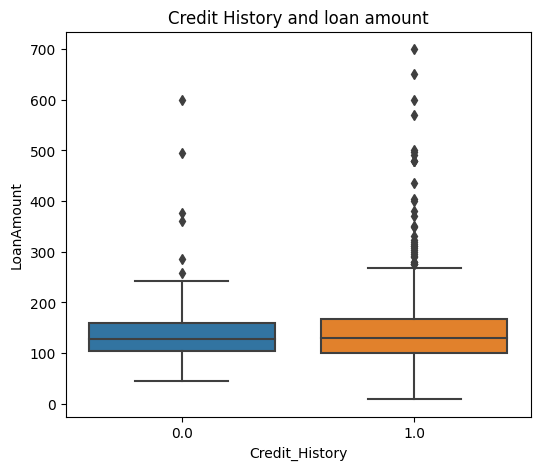

In [44]:
plt.figure(figsize = (6, 5))
plt.title("Credit History and loan amount")
sns.boxplot(x='Credit_History',y='LoanAmount',data=df)

if credit history is 1 ,then getting loan amount also increase

<AxesSubplot:title={'center':'loan status and loan amount'}, xlabel='Loan_Status', ylabel='LoanAmount'>

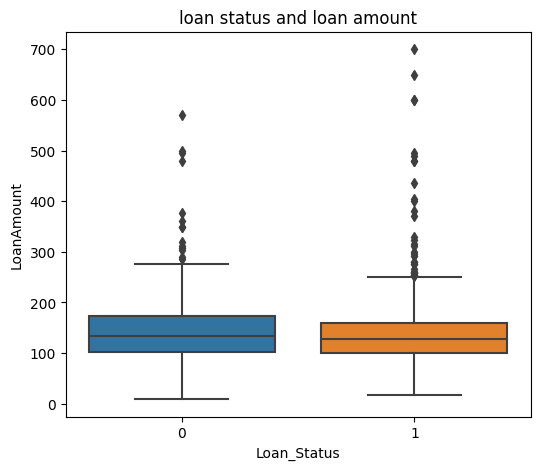

In [45]:
plt.figure(figsize = (6, 5))
plt.title("loan status and loan amount")
sns.boxplot(x='Loan_Status',y='LoanAmount',data=df)

if loan amount increases highly then the chances of loan approval status will decrease

<AxesSubplot:title={'center':'total income and loan amount'}, xlabel='Loan_Status', ylabel='TotalIncome'>

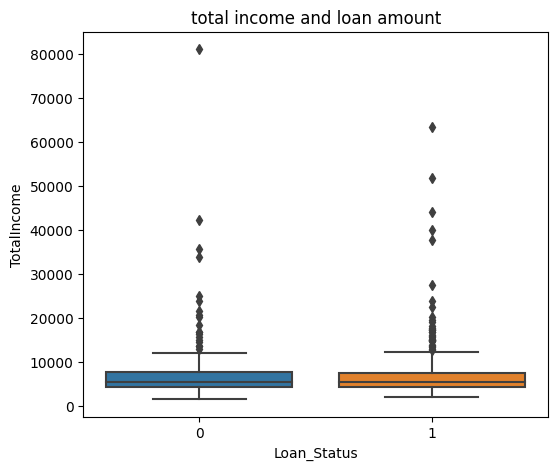

In [46]:
plt.figure(figsize = (6, 5))
plt.title("total income and loan amount")
sns.boxplot(x='Loan_Status',y='TotalIncome',data=df)

good income people has higher chance of getting loan easily

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

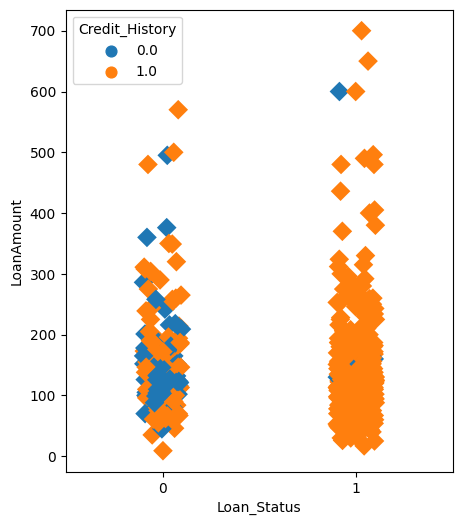

In [47]:
plt.figure(figsize=(5,6))
sns.stripplot(x='Loan_Status',y='LoanAmount',hue='Credit_History',data=df,marker='D',size=10)

if credit history is 1 then we can get the required loan amount easily

<AxesSubplot:xlabel='Loan_Status', ylabel='TotalIncome'>

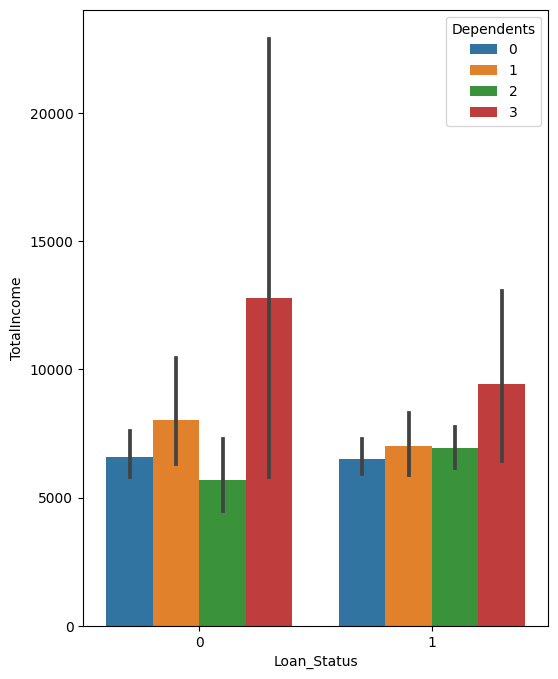

In [48]:
plt.figure(figsize=(6,8))
sns.barplot(x='Loan_Status',y='TotalIncome',hue='Dependents',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='TotalIncome'>

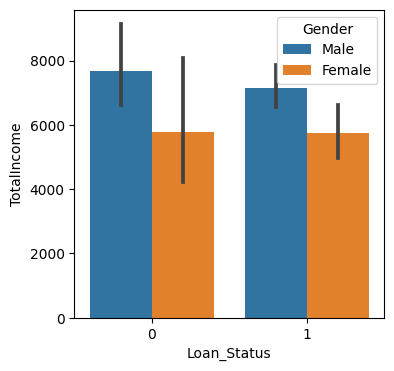

In [49]:
plt.figure(figsize=(4,4))
sns.barplot(x='Loan_Status',y='TotalIncome',hue='Gender',data=df)

Text(0.5, 1.0, 'Loan Status vs Income----Approved vs Not Approved')

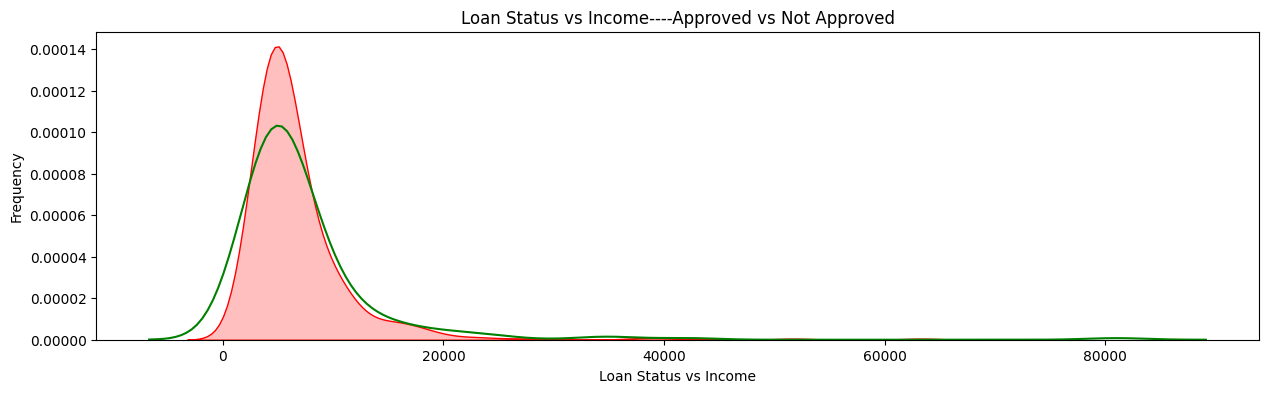

In [50]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Loan_Status']==0),'TotalIncome'],color='g',shade=False,label='No')
ax=sns.kdeplot(df.loc[(df['Loan_Status']==1),'TotalIncome'],color='r',shade=True,label=' Yes')
ax.set(xlabel='Loan Status vs Income',ylabel='Frequency')
plt.title('Loan Status vs Income----Approved vs Not Approved')

in overall chances of getting loan is higher in the bank.it will be approved if criterias are met 

# DATA PRE-PROCESSING And FEATURE ENGINEERING

In [51]:
#converting string data type to int type using LabelEncoding
le=LabelEncoder()

list1=['Loan_ID', 'Gender', 'Married','Education','Self_Employed','Property_Area', 'Loan_Status']

for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,71.000000,360.0,1.0,0,1,2900.0
610,610,1,1,3,0,0,40.000000,180.0,1.0,0,1,4106.0
611,611,1,1,1,0,0,253.000000,360.0,1.0,2,1,8312.0
612,612,1,1,2,0,0,187.000000,360.0,1.0,2,1,7583.0


In [52]:
v=df[list(df.columns)[10]] 
df=df.drop(['Loan_Status'],axis=1) 
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,0,1,0,0,0,0,146.412162,360.0,1.0,2,5849.0
1,1,1,1,1,0,0,128.000000,360.0,1.0,0,6091.0
2,2,1,1,0,0,1,66.000000,360.0,1.0,2,3000.0
3,3,1,1,0,1,0,120.000000,360.0,1.0,2,4941.0
4,4,1,0,0,0,0,141.000000,360.0,1.0,2,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,71.000000,360.0,1.0,0,2900.0
610,610,1,1,3,0,0,40.000000,180.0,1.0,0,4106.0
611,611,1,1,1,0,0,253.000000,360.0,1.0,2,8312.0
612,612,1,1,2,0,0,187.000000,360.0,1.0,2,7583.0


In [53]:
df.insert(11,'Loan_Status',v) 
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,0,1,0,0,0,0,146.412162,360.0,1.0,2,5849.0,1
1,1,1,1,1,0,0,128.000000,360.0,1.0,0,6091.0,0
2,2,1,1,0,0,1,66.000000,360.0,1.0,2,3000.0,1
3,3,1,1,0,1,0,120.000000,360.0,1.0,2,4941.0,1
4,4,1,0,0,0,0,141.000000,360.0,1.0,2,6000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,71.000000,360.0,1.0,0,2900.0,1
610,610,1,1,3,0,0,40.000000,180.0,1.0,0,4106.0,1
611,611,1,1,1,0,0,253.000000,360.0,1.0,2,8312.0,1
612,612,1,1,2,0,0,187.000000,360.0,1.0,2,7583.0,1


In [54]:
#find correlation co.efficient of all variables in table
df.corr()

,Loan_ID,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.039442,0.032874,0.035684,-0.033028,-0.030603,-0.155416,0.033774,0.011773
Gender,-0.028029,1.000000,0.364569,0.045364,-0.000525,0.107930,-0.074030,0.009170,-0.025752,0.093191,0.017987
Married,-0.016013,0.364569,1.000000,0.012304,0.004489,0.147141,-0.100912,0.010938,0.004257,0.083319,0.091478
Education,0.039442,0.045364,0.012304,1.000000,-0.010383,-0.166998,-0.073928,-0.073658,-0.065243,-0.161362,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,-0.010383,1.000000,0.115260,-0.033739,-0.001550,-0.030860,0.113000,-0.003700
LoanAmount,0.035684,0.107930,0.147141,-0.166998,0.115260,1.000000,0.036475,-0.001431,-0.044776,0.620102,-0.036416
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.073928,-0.033739,0.036475,1.000000,-0.004705,-0.076120,-0.070917,-0.022549
Credit_History,-0.030603,0.009170,0.010938,-0.073658,-0.001550,-0.001431,-0.004705,1.000000,0.001963,-0.012563,0.540556
Property_Area,-0.155416,-0.025752,0.004257,-0.065243,-0.030860,-0.044776,-0.076120,0.001963,1.000000,-0.004218,0.032112
TotalIncome,0.033774,0.093191,0.083319,-0.161362,0.113000,0.620102,-0.070917,-0.012563,-0.004218,1.000000,-0.031271


credit_history is the most positively correlated with the target column (loan_status).education is the most negatively correlated with the target column.loan id has less correlation with the target column

<AxesSubplot:>

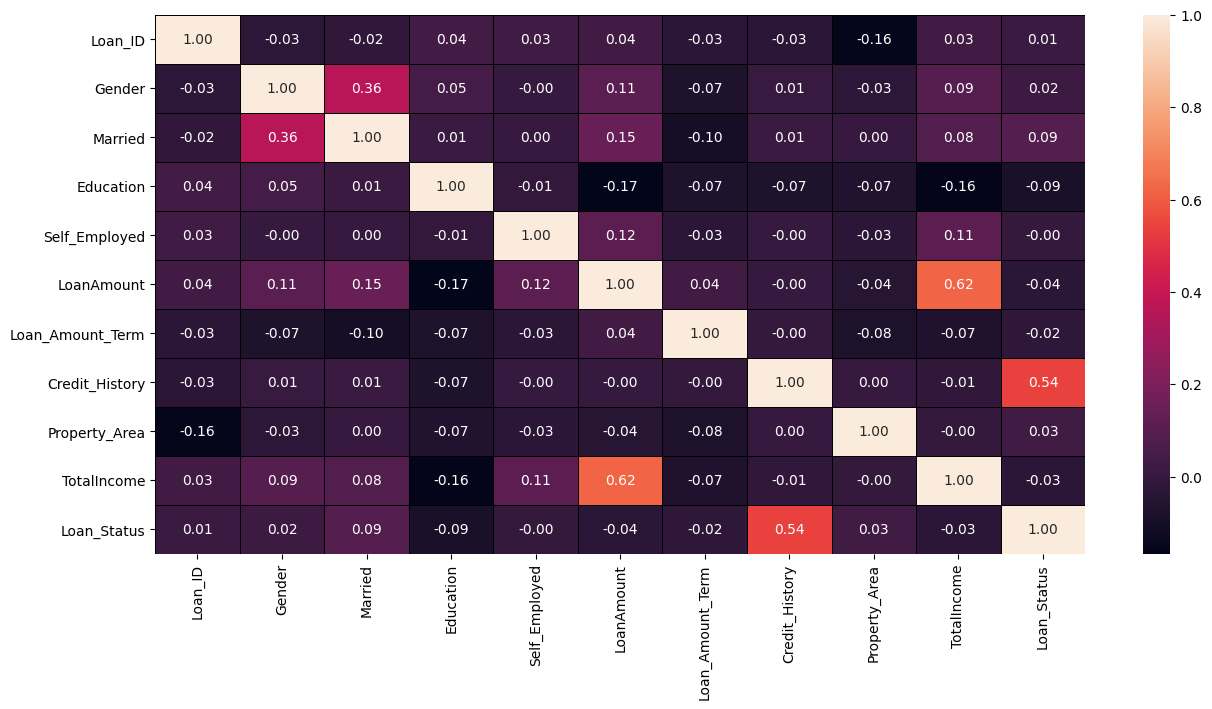

In [55]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

credit history is highly positively correlated with the target column.self employeed has very less correlation with target.eduaction is the most negatively correlated with the target column

In [56]:
df.describe()

,Loan_ID,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.218241,0.133550,146.412162,342.410423,0.855049,1.037459,7024.705081,0.687296
std,177.390811,0.386497,0.476373,0.413389,0.340446,84.037468,64.428629,0.352339,0.787482,6458.663872,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1442.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,100.250000,360.000000,1.000000,0.000000,4166.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,129.000000,360.000000,1.000000,1.000000,5416.500000,1.000000
75%,459.750000,1.000000,1.000000,0.000000,0.000000,164.750000,360.000000,1.000000,2.000000,7521.750000,1.000000
max,613.000000,1.000000,1.000000,1.000000,1.000000,700.000000,480.000000,1.000000,2.000000,81000.000000,1.000000


there is much diff between 75% and max of the totalIncome column so there should be outliers present.and others are ok it seem.the mean and std dev is much much closer to zero too

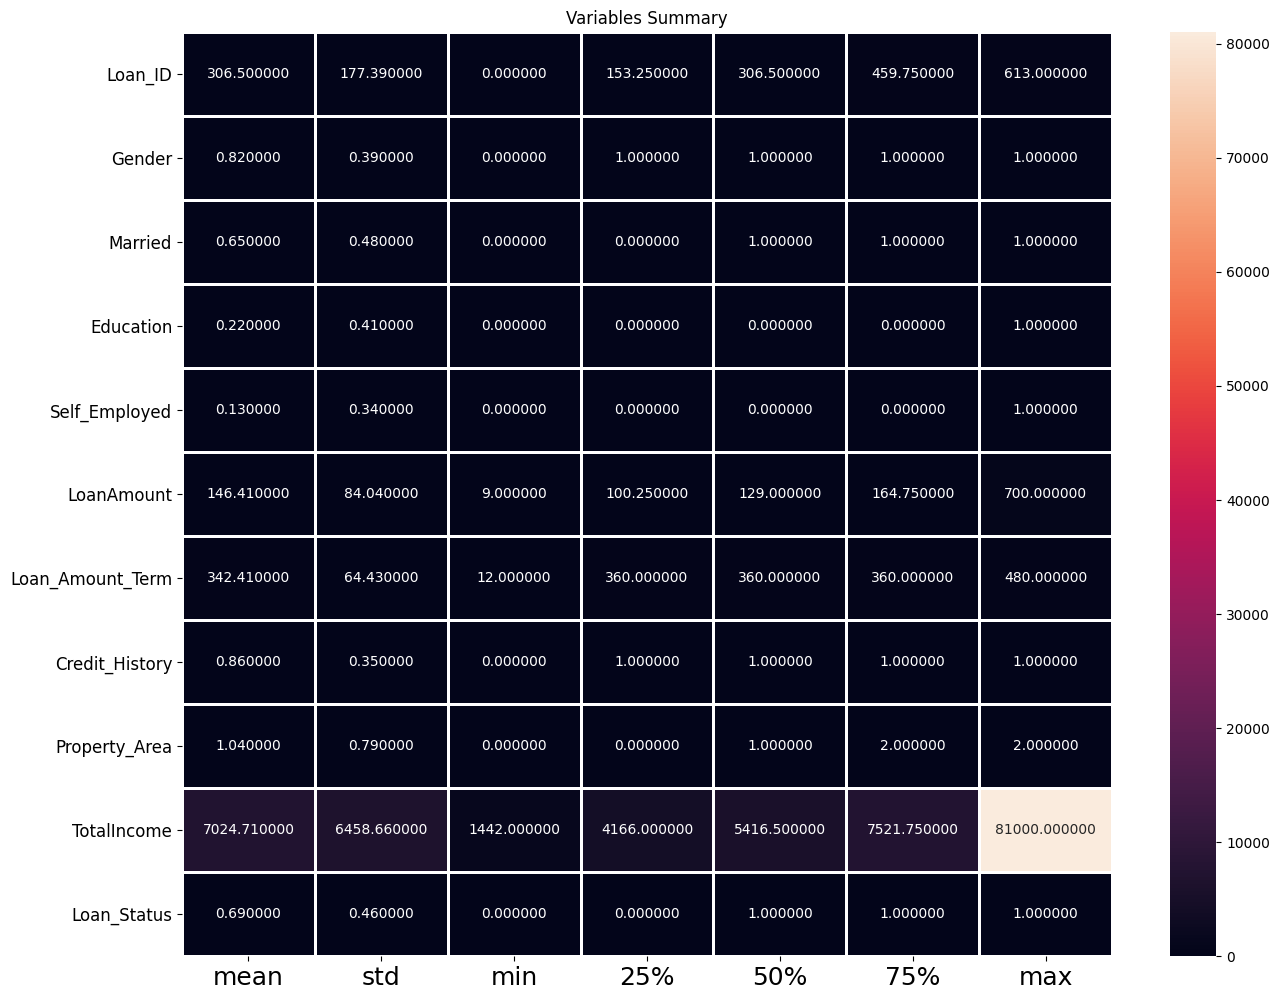

In [57]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

In [58]:
df.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
TotalIncome         0
Loan_Status         0
dtype: int64

# Variance Inflation Factor

In [59]:
#VIF calculation
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
df.shape

(614, 12)

In [61]:
df.shape[1]

12

In [62]:
df['Dependents'] = df['Dependents'].map(lambda x: float(x))

In [63]:
#calculates vif
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
    return(vif)


calc_vif(df)

,Variables,VIF FACTOR
0,Loan_ID,3.761200
1,Gender,5.999292
2,Married,3.687275
3,Dependents,1.799117
4,Education,1.322282
5,Self_Employed,1.175016
6,LoanAmount,6.871908
7,Loan_Amount_Term,11.647338
8,Credit_History,9.048498
9,Property_Area,2.590262


In [64]:
#drop unwanted columns
df.drop(['Self_Employed'], axis=1, inplace=True)

In [65]:
calc_vif(df)

,Variables,VIF FACTOR
0,Loan_ID,3.755991
1,Gender,5.999274
2,Married,3.686419
3,Dependents,1.795906
4,Education,1.321941
5,LoanAmount,6.844930
6,Loan_Amount_Term,11.644157
7,Credit_History,9.046098
8,Property_Area,2.589961
9,TotalIncome,3.610474


## Checking Outliers and Skewness

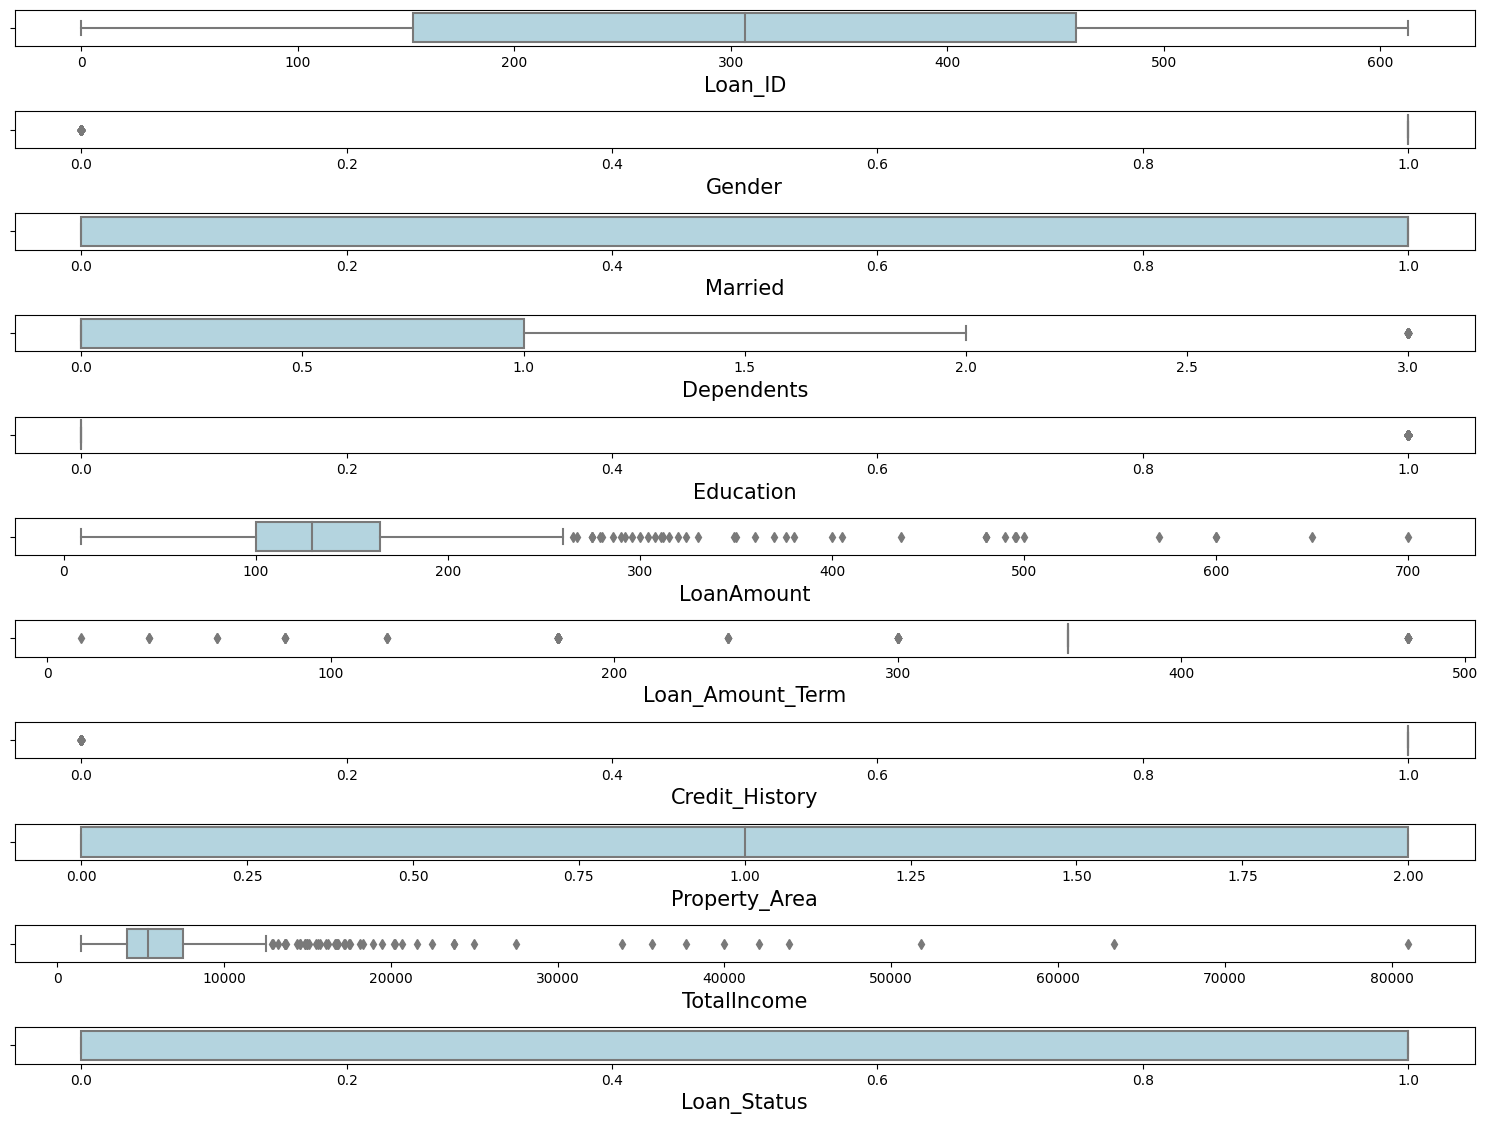

In [66]:
#checking outliers
plt.figure(figsize= (15,20))
pltnum = 1
for i in df:
    if pltnum <=20:
        plt.subplot(20,1,pltnum)
        sns.boxplot(df[i],color = 'lightblue')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

there are outliers present in TotalIncome column

In [67]:
df.skew()

Loan_ID             0.000000
Gender             -1.648795
Married            -0.644850
Dependents          1.015551
Education           1.367622
LoanAmount          2.726601
Loan_Amount_Term   -2.402112
Credit_History     -2.021971
Property_Area      -0.066196
TotalIncome         5.633449
Loan_Status        -0.809998
dtype: float64

the skewness range should be -0.5 to +0.5.the totalIncome column has very high value which is out of this range.so there should be outliers and skewness also present in it 

In [68]:
df.shape

(614, 11)

# Using Z-score to remove outliers

In [69]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape


(614, 11)

In [70]:
threshold=3
print(np.where(z>3))

(array([ 14,  68,  94, 130, 133, 155, 155, 171, 171, 177, 183, 185, 242,
       262, 278, 308, 313, 333, 333, 369, 409, 432, 443, 487, 495, 497,
       506, 506, 523, 525, 546, 561, 575, 581, 585, 600, 604], dtype=int64), array([6, 6, 6, 5, 6, 5, 9, 5, 9, 5, 9, 9, 6, 6, 5, 5, 6, 5, 9, 5, 9, 5,
       9, 5, 6, 6, 5, 9, 5, 5, 6, 5, 6, 9, 6, 9, 5], dtype=int64))


In [71]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(614, 11)
(581, 11)


some outliers got removed

In [72]:
#finds data loss
loss_percent=(614-581)/(614*100)
print(loss_percent)

0.0005374592833876222


since data percentage loss is too low and its cleaned now

# Visualization of Correlation

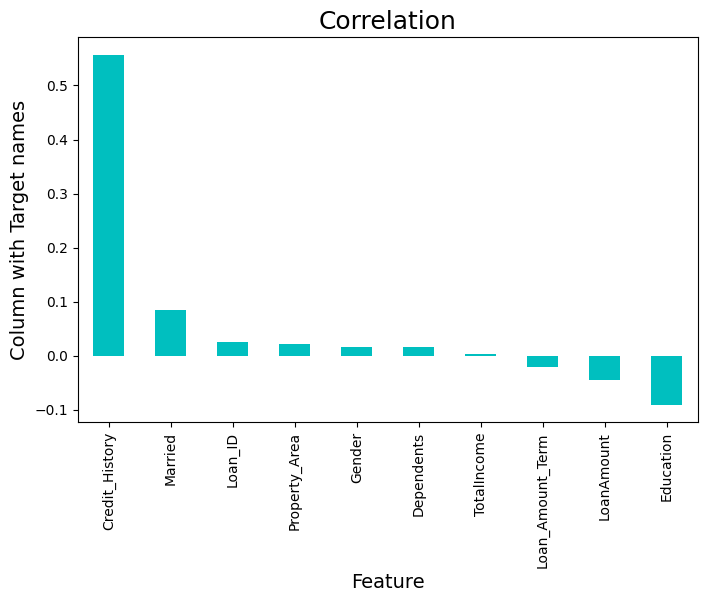

In [73]:
plt.figure(figsize=(8,5))
df_new.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

credit history is most positively correlated and education is most negatively correlated with target column.so the target column will depend on credit history mostly

In [74]:
df_new


,Loan_ID,Gender,Married,Dependents,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,0,1,0,0.0,0,146.412162,360.0,1.0,2,5849.0,1
1,1,1,1,1.0,0,128.000000,360.0,1.0,0,6091.0,0
2,2,1,1,0.0,0,66.000000,360.0,1.0,2,3000.0,1
3,3,1,1,0.0,1,120.000000,360.0,1.0,2,4941.0,1
4,4,1,0,0.0,0,141.000000,360.0,1.0,2,6000.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0.0,0,71.000000,360.0,1.0,0,2900.0,1
610,610,1,1,3.0,0,40.000000,180.0,1.0,0,4106.0,1
611,611,1,1,1.0,0,253.000000,360.0,1.0,2,8312.0,1
612,612,1,1,2.0,0,187.000000,360.0,1.0,2,7583.0,1


In [75]:
df_new.shape

(581, 11)

## Seggregating Data

In [76]:
#seggregate input data and output data
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

## SKEWNESS REMOVAL AND SCALING

In [77]:
#removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.15339307,  0.47511935, -1.36457648, ...,  0.41681815,
         1.19584013,  0.18653867],
       [-2.12767009,  0.47511935,  0.73282811, ...,  0.41681815,
        -1.34086109,  0.27379445],
       [-2.10565774,  0.47511935,  0.73282811, ...,  0.41681815,
         1.19584013, -1.4073319 ],
       ...,
       [ 1.55877569,  0.47511935,  0.73282811, ...,  0.41681815,
         1.19584013,  0.91005199],
       [ 1.56309446,  0.47511935,  0.73282811, ...,  0.41681815,
         1.19584013,  0.72809168],
       [ 1.56741114, -2.10473432, -1.36457648, ..., -2.39912775,
         0.01560951, -0.36051983]])

## Checking Skewness in Distribution

In [211]:
#take numerical column values
df_num=df[['TotalIncome','LoanAmount']]

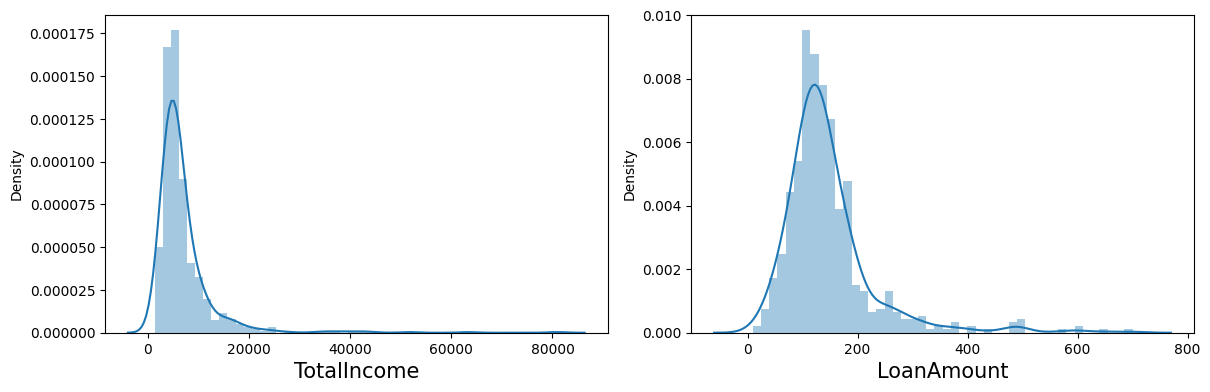

In [212]:
plt.figure(figsize = (18, 15))
plotnumber = 1

for col in df_num:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [78]:
#train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

### Scaling

In [79]:
#importing module-------scaling
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)
print(new_xtest)

[[0.52104886 1.         1.         ... 1.         0.53473802 0.52267144]
 [0.98829226 1.         0.         ... 1.         0.         0.70221068]
 [0.35386994 0.         1.         ... 1.         1.         0.88318353]
 ...
 [0.02982783 1.         1.         ... 0.         0.53473802 0.58011995]
 [0.49173526 1.         0.         ... 1.         0.         0.62998611]
 [0.65748075 1.         1.         ... 1.         1.         0.5951718 ]]
[[0.88386574 0.         1.         ... 1.         0.53473802 0.42509893]
 [0.66854114 1.         1.         ... 1.         0.53473802 0.7426852 ]
 [0.69858065 1.         1.         ... 1.         0.         0.92102406]
 ...
 [0.68771942 1.         0.         ... 1.         0.         0.65139834]
 [0.93367695 1.         1.         ... 1.         0.53473802 0.77580367]
 [0.81262265 1.         1.         ... 1.         0.53473802 0.7160279 ]]


# Resampling Technique

## Undersampling

In [80]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
 
x_train_miss, y_train_miss = nr.fit_resample(new_xtrain, y_train.ravel())
 
print('After Undersampling, the shape of train_X: {}'.format(x_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
 
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 315
Before Undersampling, counts of label '0': 149 

After Undersampling, the shape of train_X: (298, 10)
After Undersampling, the shape of train_y: (298,) 

After Undersampling, counts of label '1': 149
After Undersampling, counts of label '0': 149


# MODEL PREDICTION

## LOGISTIC REGRESSION

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [82]:
lr=LogisticRegression()




In [83]:
for i in range(0,100):
   
    lr.fit(x_train_miss, y_train_miss.ravel())
    pred_train=lr.predict(x_train_miss)
    pred_test=lr.predict(new_xtest)
    if round(accuracy_score(y_train_miss.ravel(),pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train_miss.ravel(),pred_train)*100,1)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test)*100,1)
        
        
        
   

## cv score

In [84]:
from sklearn.model_selection import cross_val_score
acc_score=accuracy_score(y_test,pred_test)
for j in range(2,10):
    cross_V_score=cross_val_score(lr,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score*100)
    print("accuracy score is:",acc_score*100)
    print("\n")
        

At cv:- 2
cross validation score is: 69.23076923076923
accuracy score is: 69.23076923076923


At cv:- 3
cross validation score is: 69.23076923076923
accuracy score is: 69.23076923076923


At cv:- 4
cross validation score is: 69.23076923076923
accuracy score is: 69.23076923076923


At cv:- 5
cross validation score is: 69.23076923076923
accuracy score is: 69.23076923076923


At cv:- 6
cross validation score is: 69.23076923076923
accuracy score is: 69.23076923076923


At cv:- 7
cross validation score is: 69.23076923076923
accuracy score is: 69.23076923076923


At cv:- 8
cross validation score is: 69.23076923076923
accuracy score is: 69.23076923076923


At cv:- 9
cross validation score is: 69.23076923076923
accuracy score is: 69.23076923076923




## Hyper parameter Tuning

In [85]:
#performs GridsearchCV logistic regression
from sklearn.model_selection import GridSearchCV
parameters={'dual':[False,True],'fit_intercept':[True,False],'random_state':list(range(0,1)),'max_iter':[100,50], 'tol':[0.001,0.01]}
lr=LogisticRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train_miss,y_train_miss)
print(clf.best_params_)


{'dual': False, 'fit_intercept': True, 'max_iter': 100, 'random_state': 0, 'tol': 0.001}


In [86]:
lr=LogisticRegression(fit_intercept= True, dual=False, max_iter= 100, random_state=0, tol= 0.001)
lr.fit(x_train_miss,y_train_miss.ravel())
pred_test_lr=lr.predict(new_xtest)
pred_train_lr=lr.predict(x_train_miss)
lr_score = lr.score(x_train_miss,y_train_miss)
lr_acc_score=accuracy_score(y_test,pred_test_lr)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 69.23076923076923
score of model is: 75.83892617449665


In [89]:
cv_score_lr=cross_val_score(lr,x,y,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 81.58561744768642


In [90]:
print(classification_report(y_test, pred_test_lr)) 

              precision    recall  f1-score   support

           0       0.45      0.56      0.50        32
           1       0.82      0.74      0.78        85

    accuracy                           0.69       117
   macro avg       0.63      0.65      0.64       117
weighted avg       0.72      0.69      0.70       117



In [91]:
print(confusion_matrix(y_test,pred_test_lr))

[[18 14]
 [22 63]]


In [92]:
print(accuracy_score(y_test,pred_test_lr)*100)

69.23076923076923


## AUC-ROC Curve

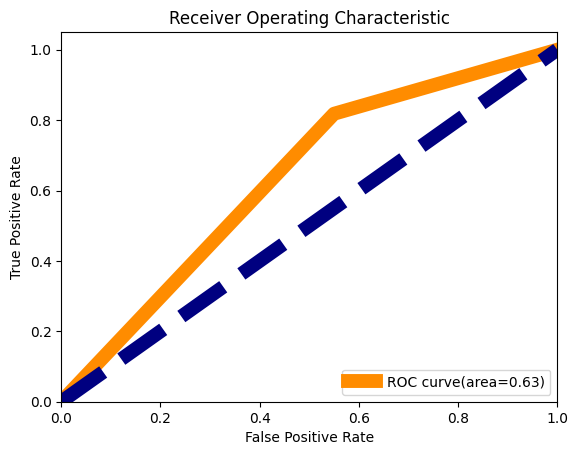

In [93]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_lr,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 63%

# RANDOM FOREST CLASSIFIER

In [94]:
# importing modules

from sklearn.ensemble import RandomForestClassifier

#creating RandomForestClassifier constructor
rf = RandomForestClassifier(random_state=5)
# fit data
rf.fit(x_train_miss,y_train_miss.ravel())
# predicting score
pred_test_rf=rf.predict(new_xtest)
pred_train_rf=rf.predict(x_train_miss)
#calculates score of the model using score method
rf_score = rf.score(new_xtest,y_test)
print('score of model is : ',rf_score*100)

score of model is :  71.7948717948718


In [95]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_miss.ravel(),pred_train_rf)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_rf)*100)

        

Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 71.7948717948718


In [96]:
#choosing best Random state
for i in range(0,100):
    rf.fit(x_train_miss, y_train_miss.ravel())
    pred_train_rf=rf.predict(x_train_miss)
    pred_test_rf=rf.predict(new_xtest)
    if round(accuracy_score(y_train_miss.ravel(),pred_train_rf)*100,1)== round(accuracy_score(y_test,pred_test_rf)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train_miss.ravel(),pred_train_rf)*100)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test_rf)*100)
        

In [97]:
print("accuracy score is:",accuracy_score(y_test,pred_test_rf)*100)

accuracy score is: 71.7948717948718


In [98]:
#cross validation 
from sklearn.model_selection import cross_val_score
acc_score_rf=accuracy_score(y_test,pred_test_rf)
for j in range(2,10):
    cross_V_score=cross_val_score(rf,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score_rf*100)
    print("accuracy score is:",acc_score_rf*100)
    print("\n")
        

At cv:- 2
cross validation score is: 71.7948717948718
accuracy score is: 71.7948717948718


At cv:- 3
cross validation score is: 71.7948717948718
accuracy score is: 71.7948717948718


At cv:- 4
cross validation score is: 71.7948717948718
accuracy score is: 71.7948717948718


At cv:- 5
cross validation score is: 71.7948717948718
accuracy score is: 71.7948717948718


At cv:- 6
cross validation score is: 71.7948717948718
accuracy score is: 71.7948717948718


At cv:- 7
cross validation score is: 71.7948717948718
accuracy score is: 71.7948717948718


At cv:- 8
cross validation score is: 71.7948717948718
accuracy score is: 71.7948717948718


At cv:- 9
cross validation score is: 71.7948717948718
accuracy score is: 71.7948717948718




## parameter tuning

In [99]:
#performs GridSearchCV on RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entropy'],'n_estimators':[50,100],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,1)),'min_weight_fraction_leaf':[0.1,0.2],'bootstrap':[True,False]}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train_miss,y_train_miss.ravel())
print(clf.best_params_)


{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'auto', 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100, 'random_state': 0}


In [101]:
rf=RandomForestClassifier(criterion="entropy",max_features="auto",n_estimators=100,random_state=0,bootstrap="False",min_weight_fraction_leaf= 0.1)
rf.fit(x_train_miss,y_train_miss.ravel())
pred_test_rf=rf.predict(new_xtest)
pred_train_rf=rf.predict(x_train_miss)
rf_score = rf.score(x_train_miss,y_train_miss)
rf_acc_score=accuracy_score(y_test,pred_test_rf)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 76.06837606837607
score of model is: 75.50335570469798


In [102]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 81.06837606837607


In [103]:
print(confusion_matrix(y_test,pred_test_rf))

[[18 14]
 [14 71]]


In [104]:
print(classification_report(y_test,pred_test_rf))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        32
           1       0.84      0.84      0.84        85

    accuracy                           0.76       117
   macro avg       0.70      0.70      0.70       117
weighted avg       0.76      0.76      0.76       117



## AUC-ROC CURVE:

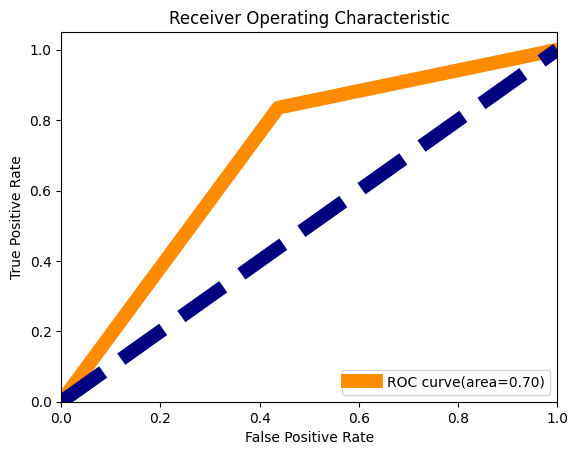

In [105]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_rf,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 70%

# DECISION TREE CLASSIFIER

In [106]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(random_state=1)
dtc.fit(x_train_miss, y_train_miss.ravel())
pred_test_dtc = dtc.predict(new_xtest)
pred_train_dtc = dtc.predict(x_train_miss)
dtc_score = dtc.score(new_xtest,y_test)
print('score of model is : ',dtc_score*100)



score of model is :  58.119658119658126


In [107]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_miss.ravel(),pred_train_dtc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_dtc)*100)


Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 58.119658119658126


## parameter tuning

In [108]:
#perform gridsearchcv and cross val score on Decison Tree DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'max_depth':[11],'min_samples_split': [2,3,4],'min_samples_leaf':[1,2,3] }
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train_miss,y_train_miss.ravel())
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 2, 'splitter': 'best'}


In [110]:
dt=DecisionTreeClassifier(criterion='entropy',max_features= 'auto',max_depth= 11 , random_state= 2, splitter= 'best',min_samples_leaf= 1,min_samples_split= 3)
dt.fit(x_train_miss,y_train_miss.ravel())
pred_test_dt=dt.predict(new_xtest)
pred_train_dt=dt.predict(x_train_miss)
dt_score = dt.score(x_train_miss,y_train_miss.ravel())
dt_acc_score=accuracy_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)

Accuracy score is: 64.95726495726495
score of model is: 90.26845637583892


In [111]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 73.33628057765989


In [112]:
print(confusion_matrix(y_test,pred_test_dt))

[[22 10]
 [31 54]]


In [113]:
print(classification_report(y_test,pred_test_dt))

              precision    recall  f1-score   support

           0       0.42      0.69      0.52        32
           1       0.84      0.64      0.72        85

    accuracy                           0.65       117
   macro avg       0.63      0.66      0.62       117
weighted avg       0.73      0.65      0.67       117



## AUC-ROC CURVE:

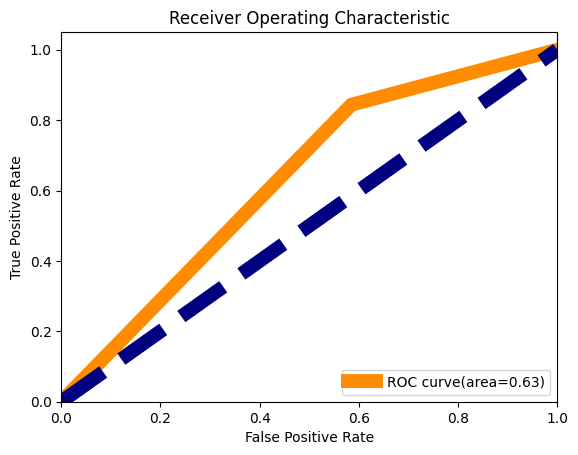

In [114]:
# ROC_AUC CURVE
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_dt,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 63%

# KNEIGHBORS CLASSIFIER

In [115]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_miss, y_train_miss.ravel())
pred_test_knn = knn.predict(new_xtest)
pred_train_knn = knn.predict(x_train_miss)
knn_score = knn.score(new_xtest,y_test)
print('score of model is : ',knn_score*100)



score of model is :  75.21367521367522


In [116]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_miss.ravel(),pred_train_knn)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_knn)*100)


Accuracy Score of Training Data is: 77.85234899328859
Accuracy Score of Testing Data is: 75.21367521367522


## parameter tuning

In [117]:
#perform gridsearchcv and cross val score on KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters={'n_neighbors':[4,5,6],'weights':['uniform', 'distance'],'leaf_size':[35,30],'n_jobs':[-1,1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'] }
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x_train_miss,y_train_miss.ravel())
print(clf.best_params_)

{'algorithm': 'auto', 'leaf_size': 35, 'n_jobs': -1, 'n_neighbors': 6, 'weights': 'distance'}


In [118]:
knn=KNeighborsClassifier(algorithm= 'auto', leaf_size= 35, n_jobs= -1, n_neighbors= 6, weights= 'distance')
knn.fit(x_train_miss,y_train_miss.ravel())
pred_test_knn=knn.predict(new_xtest)
pred_train_knn=knn.predict(x_train_miss)
knn_score = knn.score(x_train_miss,y_train_miss.ravel())
knn_acc_score=accuracy_score(y_test,pred_test_knn)
print("Accuracy score is:",knn_acc_score*100)
print("score of model is:",knn_score*100)

Accuracy score is: 74.35897435897436
score of model is: 100.0


In [119]:
cv_score_knn=cross_val_score(knn,x,y,cv=5)
cv_mean_knn=cv_score_knn.mean()
print("cv_mean is:",cv_mean_knn*100)

cv_mean is: 78.48953728264073


In [120]:
print(confusion_matrix(y_test,pred_test_knn))

[[18 14]
 [16 69]]


In [121]:
print(classification_report(y_test,pred_test_knn))

              precision    recall  f1-score   support

           0       0.53      0.56      0.55        32
           1       0.83      0.81      0.82        85

    accuracy                           0.74       117
   macro avg       0.68      0.69      0.68       117
weighted avg       0.75      0.74      0.75       117



## AUC-ROC CURVE:

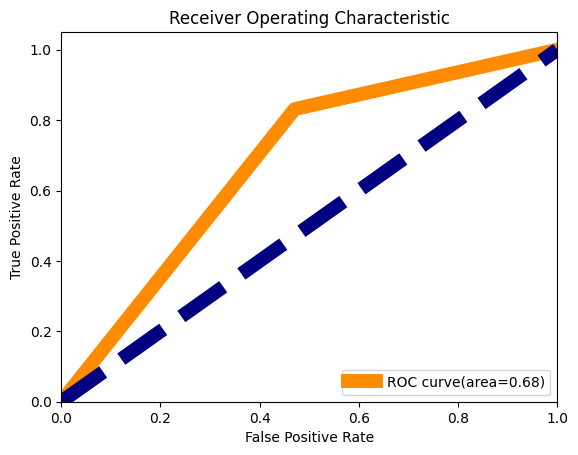

In [122]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_knn,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 68%

# GAUSSIANNB

In [123]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train_miss, y_train_miss.ravel())
pred_test_gnb = gnb.predict(new_xtest)
pred_train_gnb = gnb.predict(x_train_miss)
gnb_score = gnb.score(new_xtest,y_test)
print('score of model is : ',gnb_score*100)

score of model is :  72.64957264957265


In [124]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_miss.ravel(),pred_train_gnb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gnb)*100)


Accuracy Score of Training Data is: 77.18120805369128
Accuracy Score of Testing Data is: 72.64957264957265


## parameter tuning

In [125]:
#perform gridsearchcv and cross val score on GaussianNB
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb=GaussianNB() 
clf = GridSearchCV(estimator=gnb, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
clf.fit(x_train_miss,y_train_miss.ravel())
print(clf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 0.08111308307896872}


In [127]:
gnb=GaussianNB(var_smoothing=0.08111308307896872)
gnb.fit(x_train_miss,y_train_miss.ravel())
pred_test_gnb=gnb.predict(new_xtest)
pred_train_gnb=gnb.predict(x_train_miss)
gnb_score = gnb.score(x_train_miss,y_train_miss.ravel())
gnb_acc_score=accuracy_score(y_test,pred_test_gnb)
print("Accuracy score is:",gnb_acc_score*100)
print("score of model is:",gnb_score*100)

Accuracy score is: 76.06837606837607
score of model is: 77.18120805369128


In [128]:
cv_score_gnb=cross_val_score(gnb,x,y,cv=5)
cv_mean_gnb=cv_score_gnb.mean()
print("cv_mean is:",cv_mean_gnb*100)




cv_mean is: 81.75655761862659


In [129]:
print(confusion_matrix(y_test,pred_test_gnb))

[[20 12]
 [16 69]]


In [130]:
print(classification_report(y_test,pred_test_gnb))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59        32
           1       0.85      0.81      0.83        85

    accuracy                           0.76       117
   macro avg       0.70      0.72      0.71       117
weighted avg       0.77      0.76      0.76       117



## AUC-ROC CURVE:

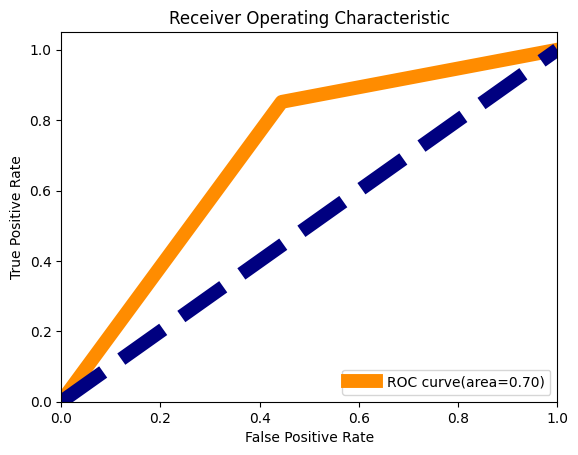

In [131]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_gnb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 70%

# SUPPROT VECTOR CLASSIFIER

In [132]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train_miss, y_train_miss.ravel())
pred_test_svc = svc.predict(new_xtest)
pred_train_svc = svc.predict(x_train_miss)
svc_score = svc.score(new_xtest,y_test)
print('score of model is : ',svc_score*100)

score of model is :  68.37606837606837


In [133]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_miss.ravel(),pred_train_svc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_svc)*100)


Accuracy Score of Training Data is: 79.19463087248322
Accuracy Score of Testing Data is: 68.37606837606837


## parameter tuning

In [134]:
#perform gridsearchcv and cross val score on Support Vector classifier

parameters ={'kernel':['linear','rbf'],'tol':[0.01,0.001],'shrinking':[True,False],'max_iter':[1,-1],'probability':[True,False]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train_miss,y_train_miss.ravel())
print(clf.best_params_)


{'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'shrinking': True, 'tol': 0.01}


In [135]:
svc=SVC(kernel='rbf',max_iter= -1, probability= True, shrinking= True, tol= 0.01)
svc.fit(x_train_miss,y_train_miss.ravel())
pred_test_svc=svc.predict(new_xtest)
pred_train_svc=svc.predict(x_train_miss)
svc_score = svc.score(x_train_miss,y_train_miss.ravel())
svc_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",svc_acc_score*100)
print("score of model is:",svc_score*100)

Accuracy score is: 69.23076923076923
score of model is: 79.19463087248322


In [136]:
cv_score_svc=cross_val_score(svc,x,y,cv=5)
cv_mean_svc=cv_score_svc.mean()
print("cv_mean is:",cv_mean_svc*100)

cv_mean is: 81.58414382552314


In [137]:
print(confusion_matrix(y_test,pred_test_svc))

[[19 13]
 [24 61]]


In [138]:
print(classification_report(y_test,pred_test_svc))

              precision    recall  f1-score   support

           0       0.44      0.59      0.51        32
           1       0.82      0.72      0.77        85

    accuracy                           0.68       117
   macro avg       0.63      0.66      0.64       117
weighted avg       0.72      0.68      0.70       117



## AUC-ROC CURVE:

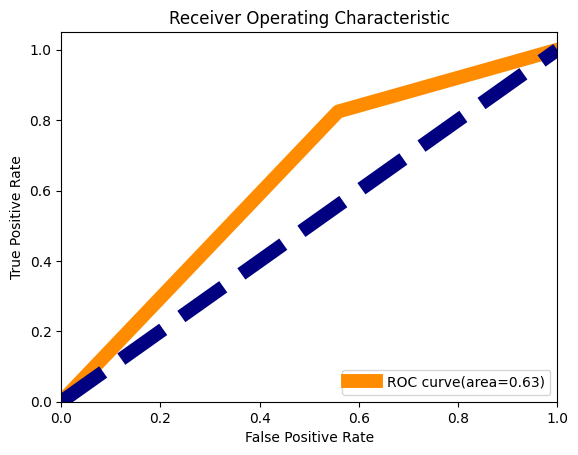

In [139]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_svc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 63%

# GRADIENT BOOSTING CLASSIFIER

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=7)
gb.fit(x_train_miss, y_train_miss)
pred_test_gb = gb.predict(new_xtest)
pred_train_gb = gb.predict(x_train_miss)
gb_score = gb.score(new_xtest,y_test)
print('score of model is : ',gb_score*100)




score of model is :  64.95726495726495


In [141]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_miss.ravel(),pred_train_gb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gb)*100)

Accuracy Score of Training Data is: 94.63087248322147
Accuracy Score of Testing Data is: 64.95726495726495


## parameter tuning

In [142]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['squared_error','mse'],'n_estimators':[150],'random_state':list(range(0,1)),'min_weight_fraction_leaf':[0.1,0.2] }
gb=GradientBoostingClassifier()
clf=GridSearchCV(gb,parameters)
clf.fit(x_train_miss,y_train_miss.ravel())
print(clf.best_params_)


{'criterion': 'squared_error', 'min_weight_fraction_leaf': 0.1, 'n_estimators': 150, 'random_state': 0}


In [143]:
gb=GradientBoostingClassifier(criterion="squared_error",n_estimators=150,random_state=0,min_weight_fraction_leaf= 0.1)
gb.fit(x_train_miss,y_train_miss.ravel())
pred_test_gb=gb.predict(new_xtest)
pred_train_gb=gb.predict(x_train_miss)
gb_score = gb.score(x_train_miss,y_train_miss.ravel())
gb_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",gb_acc_score*100)
print("score of model is:",gb_score*100)

Accuracy score is: 69.23076923076923
score of model is: 88.9261744966443


In [144]:
cv_score_gb=cross_val_score(gb,x,y,cv=5)
cv_mean_gb=cv_score_gb.mean()
print("cv_mean is:",cv_mean_gb*100)

cv_mean is: 79.35307987032125


In [145]:
print(confusion_matrix(y_test,pred_test_gb))

[[21 11]
 [27 58]]


In [146]:
print(classification_report(y_test,pred_test_gb))

              precision    recall  f1-score   support

           0       0.44      0.66      0.53        32
           1       0.84      0.68      0.75        85

    accuracy                           0.68       117
   macro avg       0.64      0.67      0.64       117
weighted avg       0.73      0.68      0.69       117



## AUC-ROC CURVE:

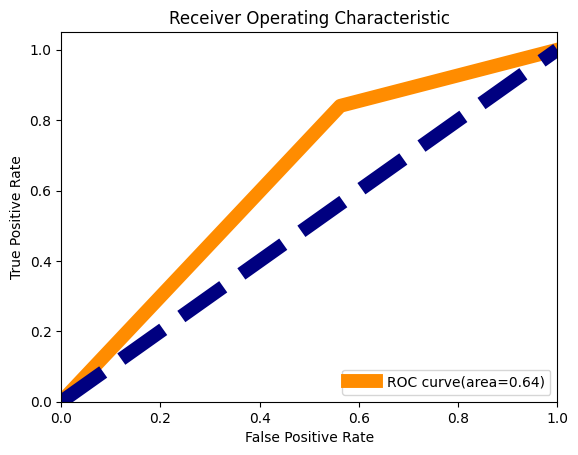

In [147]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_gb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 66%

# LIGHT GRADIENT BOOSTING CLASSIFIER

In [148]:
!pip install lightgbm

In [149]:
#Light Gradient Boosting Classifier

In [150]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(x_train_miss, y_train_miss.ravel())
pred_test_lgbm = lgbm.predict(new_xtest)
pred_train_lgbm = lgbm.predict(x_train_miss)
lgbm_score = lgbm.score(new_xtest,y_test)
print('score of model is : ',lgbm_score*100)



score of model is :  67.52136752136752


In [151]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_miss.ravel(),pred_train_lgbm)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_lgbm)*100)


Accuracy Score of Training Data is: 97.6510067114094
Accuracy Score of Testing Data is: 67.52136752136752


## Parameter Tuning

In [170]:
from sklearn.model_selection import GridSearchCV
parameters={'num_leaves': [31, 127],'reg_alpha': [0.1, 0.5],'max_depth':[5,200],'learning_rate': [0,1],'boosting_type':['gbdt', 'dart', 'goss'],'metric':['mae']}
lgbm=LGBMClassifier()
clf=GridSearchCV(lgbm,parameters)
clf.fit(x_train_miss,y_train_miss.ravel())
print(clf.best_params_)

{'boosting_type': 'dart', 'learning_rate': 1, 'max_depth': 200, 'metric': 'mae', 'num_leaves': 31, 'reg_alpha': 0.5}


In [171]:
lgbm=LGBMClassifier(boosting_type= 'dart', learning_rate= 1, max_depth=200, metric='mae', num_leaves=31, reg_alpha= 0.5)
lgbm.fit(x_train_miss,y_train_miss.ravel())
pred_test_lgbm=lgbm.predict(new_xtest)
pred_train_lgbm=lgbm.predict(x_train_miss)
lgbm_score = lgbm.score(x_train_miss,y_train_miss)
lgbm_acc_score=accuracy_score(y_test,pred_test_lgbm)
print("Accuracy score is:",lgbm_acc_score*100)
print("score of model is:",lgbm_score*100)

Accuracy score is: 67.52136752136752
score of model is: 100.0


In [172]:
print(confusion_matrix(y_test,pred_test_lgbm))

[[22 10]
 [28 57]]


In [173]:
print(classification_report(y_test,pred_test_lgbm))

              precision    recall  f1-score   support

           0       0.44      0.69      0.54        32
           1       0.85      0.67      0.75        85

    accuracy                           0.68       117
   macro avg       0.65      0.68      0.64       117
weighted avg       0.74      0.68      0.69       117



## AUC-ROC CURVE:

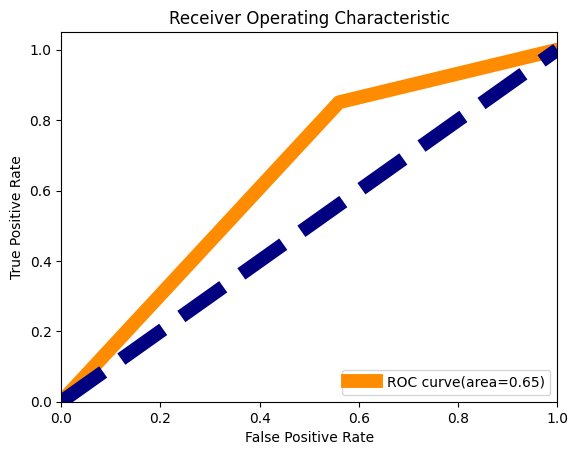

In [174]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_lgbm,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 65%

# CAT BOOST CLASSIFIER

In [155]:
!pip install catboost

In [156]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train_miss, y_train_miss.ravel())
pred_test_cat = cat.predict(new_xtest)
pred_train_cat = cat.predict(x_train_miss)
cat_score = cat.score(new_xtest,y_test)
print('score of model is : ',cat_score*100)



Learning rate set to 0.006144
0:	learn: 0.6906220	total: 142ms	remaining: 2m 22s
1:	learn: 0.6882037	total: 144ms	remaining: 1m 11s
2:	learn: 0.6857324	total: 145ms	remaining: 48.2s
3:	learn: 0.6835304	total: 145ms	remaining: 36.2s
4:	learn: 0.6810397	total: 147ms	remaining: 29.2s
5:	learn: 0.6786142	total: 148ms	remaining: 24.5s
6:	learn: 0.6759810	total: 149ms	remaining: 21.1s
7:	learn: 0.6735750	total: 150ms	remaining: 18.6s
8:	learn: 0.6710447	total: 152ms	remaining: 16.7s
9:	learn: 0.6687411	total: 153ms	remaining: 15.1s
10:	learn: 0.6666198	total: 154ms	remaining: 13.8s
11:	learn: 0.6645792	total: 155ms	remaining: 12.7s
12:	learn: 0.6622529	total: 156ms	remaining: 11.8s
13:	learn: 0.6602092	total: 157ms	remaining: 11.1s
14:	learn: 0.6578196	total: 158ms	remaining: 10.4s
15:	learn: 0.6556657	total: 159ms	remaining: 9.8s
16:	learn: 0.6536768	total: 161ms	remaining: 9.29s
17:	learn: 0.6515298	total: 162ms	remaining: 8.83s
18:	learn: 0.6493905	total: 163ms	remaining: 8.42s
19:	learn:

In [157]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_miss.ravel(),pred_train_cat)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_cat)*100)


Accuracy Score of Training Data is: 94.29530201342283
Accuracy Score of Testing Data is: 70.08547008547008


## parameter tuning

In [160]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,50],'depth': [4,5,6],'learning_rate' : [0.01,0.02]}
cat = CatBoostClassifier()
clf=GridSearchCV(cat,parameters)
clf.fit(x_train_miss,y_train_miss.ravel())
print(clf.best_params_)

0:	learn: 0.6911200	total: 596us	remaining: 59.1ms
1:	learn: 0.6894061	total: 1.06ms	remaining: 52.1ms
2:	learn: 0.6875518	total: 2.18ms	remaining: 70.5ms
3:	learn: 0.6853920	total: 2.61ms	remaining: 62.6ms
4:	learn: 0.6832715	total: 3.13ms	remaining: 59.4ms
5:	learn: 0.6815794	total: 3.58ms	remaining: 56.1ms
6:	learn: 0.6796308	total: 4.12ms	remaining: 54.7ms
7:	learn: 0.6781904	total: 4.55ms	remaining: 52.4ms
8:	learn: 0.6764980	total: 5.24ms	remaining: 53ms
9:	learn: 0.6752232	total: 5.79ms	remaining: 52.1ms
10:	learn: 0.6736858	total: 6.26ms	remaining: 50.6ms
11:	learn: 0.6722297	total: 6.78ms	remaining: 49.7ms
12:	learn: 0.6707448	total: 7.26ms	remaining: 48.6ms
13:	learn: 0.6690435	total: 7.75ms	remaining: 47.6ms
14:	learn: 0.6673286	total: 8.47ms	remaining: 48ms
15:	learn: 0.6659874	total: 9.05ms	remaining: 47.5ms
16:	learn: 0.6643867	total: 9.53ms	remaining: 46.5ms
17:	learn: 0.6629909	total: 10.1ms	remaining: 46ms
18:	learn: 0.6615616	total: 10.6ms	remaining: 45.3ms
19:	learn:

In [161]:
cat=CatBoostClassifier(depth= 6, learning_rate= 0.02, n_estimators= 100)
cat.fit(x_train_miss,y_train_miss.ravel())
pred_test_cat=cat.predict(new_xtest)
pred_train_cat=cat.predict(x_train_miss)
cat_score = cat.score(x_train_miss,y_train_miss)
cat_acc_score=accuracy_score(y_test,pred_test_cat)
print("Accuracy score is:",cat_acc_score*100)
print("score of model is:",cat_score*100)

0:	learn: 0.6899054	total: 1.02ms	remaining: 101ms
1:	learn: 0.6871543	total: 2.3ms	remaining: 113ms
2:	learn: 0.6837014	total: 3.31ms	remaining: 107ms
3:	learn: 0.6805042	total: 4.22ms	remaining: 101ms
4:	learn: 0.6770275	total: 4.82ms	remaining: 91.5ms
5:	learn: 0.6735064	total: 5.7ms	remaining: 89.2ms
6:	learn: 0.6703548	total: 6.49ms	remaining: 86.2ms
7:	learn: 0.6680165	total: 7.32ms	remaining: 84.2ms
8:	learn: 0.6655765	total: 8.3ms	remaining: 83.9ms
9:	learn: 0.6622078	total: 8.99ms	remaining: 80.9ms
10:	learn: 0.6597220	total: 9.96ms	remaining: 80.5ms
11:	learn: 0.6567689	total: 10.8ms	remaining: 79.4ms
12:	learn: 0.6543210	total: 12.3ms	remaining: 82ms
13:	learn: 0.6514244	total: 13.1ms	remaining: 80.2ms
14:	learn: 0.6479721	total: 13.5ms	remaining: 76.6ms
15:	learn: 0.6460477	total: 14.3ms	remaining: 75ms
16:	learn: 0.6439560	total: 15.1ms	remaining: 73.7ms
17:	learn: 0.6415527	total: 15.8ms	remaining: 72.2ms
18:	learn: 0.6390136	total: 16.6ms	remaining: 70.8ms
19:	learn: 0.6

In [162]:
print(confusion_matrix(y_test,pred_test_cat))

[[13 19]
 [ 4 81]]


In [163]:
print(classification_report(y_test,pred_test_cat))

              precision    recall  f1-score   support

           0       0.76      0.41      0.53        32
           1       0.81      0.95      0.88        85

    accuracy                           0.80       117
   macro avg       0.79      0.68      0.70       117
weighted avg       0.80      0.80      0.78       117



## AUC-ROC CURVE:

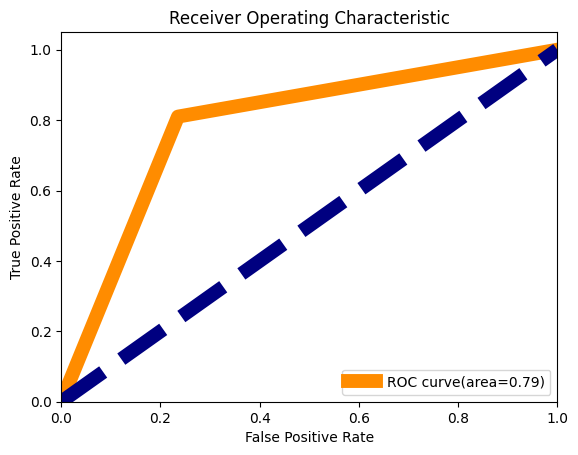

In [164]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_cat,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 79%

# EXTRA TREE CLASSIFIER

In [165]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train_miss, y_train_miss.ravel())
pred_test_etc = etc.predict(new_xtest)
pred_train_etc = etc.predict(x_train_miss)
etc_score = etc.score(new_xtest,y_test)
print('score of model is : ',etc_score*100)

score of model is :  68.37606837606837


In [167]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_miss.ravel(),pred_train_etc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_etc)*100)

Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 68.37606837606837


## parameter tuning

In [168]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'],'n_estimators':[50,100],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,1)),'min_weight_fraction_leaf':[0.1,0.2],'max_depth':[2,4]}
etc = ExtraTreesClassifier()
clf=GridSearchCV(etc,parameters)
clf.fit(x_train_miss,y_train_miss.ravel())
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100, 'random_state': 0}


In [176]:
etc = ExtraTreesClassifier(criterion= 'gini', max_depth= 2, max_features='auto', min_weight_fraction_leaf= 0.1, n_estimators= 100, random_state= 0)
etc.fit(x_train_miss,y_train_miss.ravel())
pred_test_etc=etc.predict(new_xtest)
pred_train_etc=etc.predict(x_train_miss)
etc_score = etc.score(x_train_miss,y_train_miss)
etc_acc_score=accuracy_score(y_test,pred_test_etc)
print("Accuracy score is:",etc_acc_score*100)
print("score of model is:",etc_score*100)

Accuracy score is: 73.50427350427351
score of model is: 72.81879194630872


In [177]:
print(confusion_matrix(y_test,pred_test_etc))

[[19 13]
 [18 67]]


In [178]:
print(classification_report(y_test,pred_test_etc))

              precision    recall  f1-score   support

           0       0.51      0.59      0.55        32
           1       0.84      0.79      0.81        85

    accuracy                           0.74       117
   macro avg       0.68      0.69      0.68       117
weighted avg       0.75      0.74      0.74       117



## AUC-ROC CURVE:

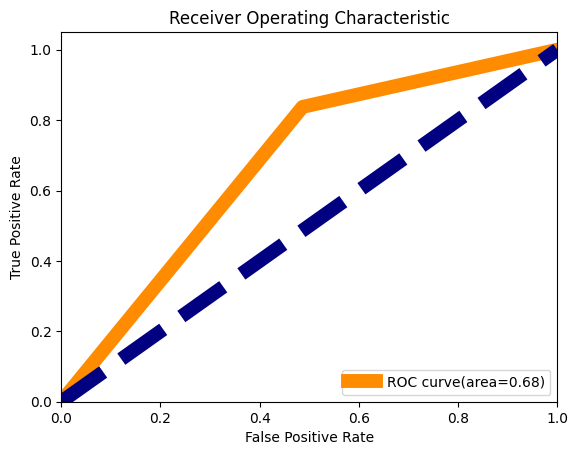

In [179]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_etc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 68%

# ADA BOOST CLASSIFIER

In [180]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=40,n_estimators=50,base_estimator=svc,algorithm='SAMME',learning_rate=0.05)
abc.fit(x_train_miss, y_train_miss.ravel())
pred_test_abc = abc.predict(new_xtest)
pred_train_abc = abc.predict(x_train_miss)
abc_score = abc.score(new_xtest,y_test)
print('score of model is : ',abc_score*100)



score of model is :  70.94017094017094


In [181]:
print(confusion_matrix(y_test,pred_test_abc))

[[20 12]
 [22 63]]


In [182]:
print(classification_report(y_test,pred_test_abc))

              precision    recall  f1-score   support

           0       0.48      0.62      0.54        32
           1       0.84      0.74      0.79        85

    accuracy                           0.71       117
   macro avg       0.66      0.68      0.66       117
weighted avg       0.74      0.71      0.72       117



## AUC-ROC CURVE:

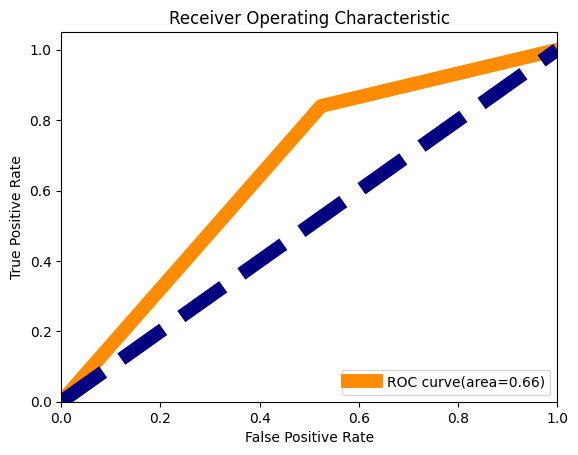

In [183]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_abc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 66%

# XGBOOST

In [184]:
!pip install xgboost

In [185]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train_miss, y_train_miss.ravel())
pred_test_xgb = xgb.predict(new_xtest)
pred_train_xgb = xgb.predict(x_train_miss)
xgb_score = xgb.score(new_xtest,y_test)
print('score of model is : ',xgb_score*100)




[04:23:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score of model is :  68.37606837606837


In [189]:
import xgboost as xgb
xgb = xgb.XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
xgb.fit(x_train_miss, y_train_miss.ravel())
pred_test_xgb = xgb.predict(new_xtest)
pred_train_xgb = xgb.predict(x_train_miss)
xgb_score = xgb.score(new_xtest,y_test)
print('score of model is : ',xgb_score*100)




[04:24:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score of model is :  69.23076923076923


In [190]:
print(confusion_matrix(y_test,pred_test_xgb))

[[22 10]
 [26 59]]


In [191]:
print(classification_report(y_test,pred_test_xgb))

              precision    recall  f1-score   support

           0       0.46      0.69      0.55        32
           1       0.86      0.69      0.77        85

    accuracy                           0.69       117
   macro avg       0.66      0.69      0.66       117
weighted avg       0.75      0.69      0.71       117



AUC-ROC CURVE:

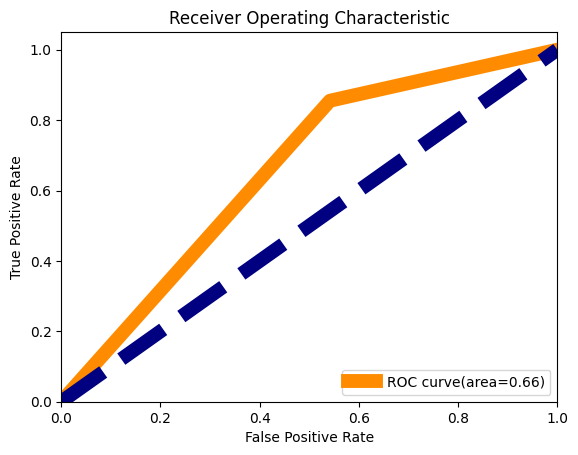

In [192]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_xgb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 66%

# VOTING CLASSIFIER

In [193]:
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('knn',KNeighborsClassifier()))
estimator.append(('svc',SVC(gamma='auto',probability=True)))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator

[('knn', KNeighborsClassifier()),
 ('svc', SVC(gamma='auto', probability=True)),
 ('dtc', DecisionTreeClassifier())]

## HARD VOTING CLASSIFIER

In [194]:
vot_hard=VotingClassifier(estimators=estimator,voting='hard',flatten_transform='True',verbose='True',n_jobs=1)
vot_hard.fit(x_train_miss,y_train_miss.ravel())
y_pred_vot_h=vot_hard.predict(new_xtest)
print(y_pred_vot_h)
vot_h_score=accuracy_score(y_test,y_pred_vot_h)
print("Hard Voting Score %d" %vot_h_score)

[Voting] ...................... (1 of 3) Processing knn, total=   0.0s
[Voting] ...................... (2 of 3) Processing svc, total=   0.0s
[Voting] ...................... (3 of 3) Processing dtc, total=   0.0s
[0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1]
Hard Voting Score 0


## SOFT VOTING CLASSIFIER

In [197]:
vot_hard=VotingClassifier(estimators=estimator,voting='soft',flatten_transform='True',verbose='True',n_jobs=-1)
vot_hard.fit(x_train_miss,y_train_miss.ravel())
y_pred_vot_s=vot_hard.predict(new_xtest)
print(y_pred_vot_s)
vot_s_score=accuracy_score(y_test,y_pred_vot_s)
print("Soft Voting Score %d" %vot_s_score)

[0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1
 0 1 1 1 1 1]
Soft Voting Score 0


## AUC-ROC CURVE:for Hard voting clasifier

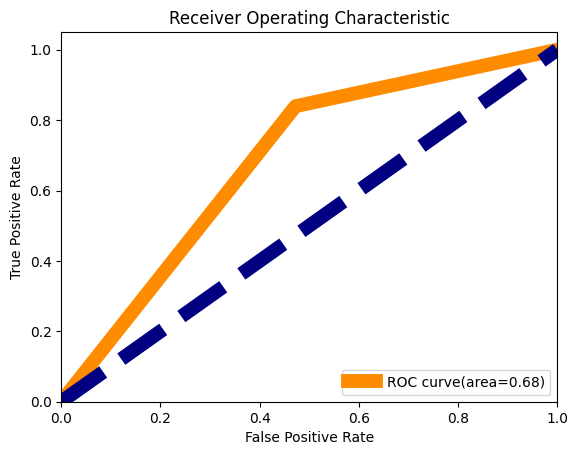

In [198]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred_vot_h,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 68%

## AUC-ROC CURVE:for soft voting clasifier

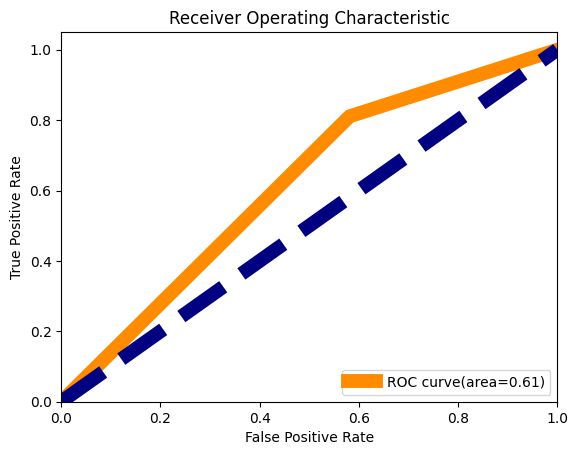

In [199]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred_vot_s,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 61%

# CONCLUSION


## OUTPUT

In [208]:
import numpy as np
a=np.array(y_test)
predicted=np.array(cat.predict(new_xtest))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


,Original,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
112,1,1
113,1,1
114,1,1
115,1,1


## SAVE MODEL

In [209]:
import pickle
filename='Loan_Application_Status_Prediction1.pkl'
pickle.dump(cat,open(filename,'wb'))


In [204]:
models=['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC','Gradient Boosting Classifier','Light Gradient Boosting Classifier','CatBoostClassifier',
'ExtraTreesClassifier','AdaBoost','XGBoost','Voting classifier','Soft Voting Classifier']
        

In [205]:
scores=[(accuracy_score(y_test,pred_test_lr)*100),accuracy_score(y_test,pred_test_rf)*100,accuracy_score(y_test,pred_test_dtc)*100,
       accuracy_score(y_test,pred_test_knn)*100,accuracy_score(y_test,pred_test_gnb)*100,accuracy_score(y_test,pred_test_svc)*100,
       accuracy_score(y_test,pred_test_gb)*100,accuracy_score(y_test,pred_test_lgbm)*100,accuracy_score(y_test,pred_test_cat)*100,
       accuracy_score(y_test,pred_test_etc)*100,accuracy_score(y_test,pred_test_abc)*100,accuracy_score(y_test,pred_test_xgb)*100,accuracy_score(y_test,y_pred_vot_h)*100,
       accuracy_score(y_test,y_pred_vot_s)*100]
scores

[69.23076923076923,
 76.06837606837607,
 58.119658119658126,
 74.35897435897436,
 76.06837606837607,
 68.37606837606837,
 67.52136752136752,
 67.52136752136752,
 80.34188034188034,
 73.50427350427351,
 70.94017094017094,
 69.23076923076923,
 74.35897435897436,
 66.66666666666666]

In [206]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [207]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.sort_values(by='Scores', ascending=False).style.hide_index()

Nos,Model Names,Scores
9,CatBoostClassifier,80.341880
2,RandomForestClassifier,76.068376
5,GaussianNB,76.068376
4,KNeighborsClassifier,74.358974
13,Voting classifier,74.358974
10,ExtraTreesClassifier,73.504274
11,AdaBoost,70.940171
1,LogisticRegression,69.230769
12,XGBoost,69.230769
6,SVC,68.376068


## Best Model

From the above models CatBoostClassifier performs well. Because,CatBoost is the only boosting algorithm with very less prediction time. Thanks to its symmetric tree structure. It is comparatively 8x faster than XGBoost while predicting.

CatBoost is that it is easy to use, efficient, and works especially well with categorical variables. As the name implies, CatBoost means ‘categorical’ boosting. It is quicker to use than, say, XGBoost, because it does not require the use of pre-processing your data, which can take the most amount of time in model building process

So we save this model for prediction

## Key Insights

From the above analysis we conclude there are chances of availabilty of loan approval.And its based on the prima factors of credit_history,Income,LoanAmount,Salaried employees,duration etc.,

In [210]:
df_con.to_csv("Loan_Application_Status.csv",sep='\t')